# 取最优的k

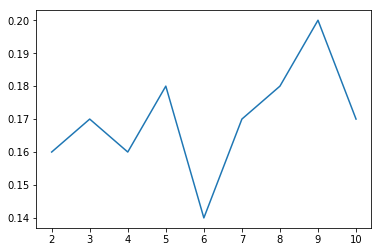

max k 9
0.324
Time: 0:01:42.683413 s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors

DATA_PATH = "D:/学习/课程资料/计算机视觉/cifar-10-python/cifar-10-batches-py/"

def unpack(fname):
    import pickle
    with open(fname, "rb") as fin:
        dumped = pickle.load(fin, encoding="bytes")
    return dumped

def reshape(data):
    img = np.zeros((32, 32, 3), 'uint8')
    img[..., 0] = np.reshape(data[:1024], (32, 32))
    img[..., 1] = np.reshape(data[1024:2048], (32, 32))
    img[..., 2] = np.reshape(data[2048:3072], (32, 32))
    return img


batches_meta = unpack(DATA_PATH + "batches.meta")
data_batches = [
    unpack(DATA_PATH + "data_batch_" + str(i+1))
    for i in range(5)
]
test_batch = unpack(DATA_PATH + "test_batch")

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.feature import hog
radius = 3
n_points = 8 * radius
data_lbp = []
labels_lbp = []
for i in range(5):
    labels_lbp.extend(data_batches[i][b"labels"])
    for img in data_batches[i][b"data"]:
        tmp  = local_binary_pattern(rgb2gray(reshape(img)), n_points, radius)
        data_lbp.append(tmp.flatten())
    # data_batches[i][b"data"] = [((hog(rgb2gray(reshape(img))))) for img in data_batches[i][b"data"]]
# from tkinter import _flatten
# labels_lbp = list(_flatten(labels_lbp)))
indext = 0
test_lbp = []
for img in test_batch[b"data"]:
        tmp  = local_binary_pattern(rgb2gray(reshape(img)), n_points, radius)
        test_lbp.append(tmp.flatten())

hyperparam_train_data = data_lbp[:900]
hyperparam_train_labels = labels_lbp[:900]
hyperparam_test_data = data_lbp[900:1000]
hyperparam_test_labels = labels_lbp[900:1000]

import datetime
begin = datetime.datetime.now()
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
correct_sums = []

for k in ks:
    clf = neighbors.KNeighborsClassifier(k, weights="distance")
    clf.fit(hyperparam_train_data, hyperparam_train_labels)
    
    predict = clf.predict(hyperparam_test_data)
    
    correct_sum = 0
    for i in range(len(predict)):
        if (predict[i] == hyperparam_test_labels[i]):
            correct_sum += 1
    
    correct_sums.append(correct_sum / 100.0)

plt.plot(ks, correct_sums)
plt.show()
maxindex = correct_sums.index(max(correct_sums))
print("max k",ks[maxindex])
clf = neighbors.KNeighborsClassifier(ks[maxindex], weights="distance")

# for i in range(5):
clf.fit(data_lbp, labels_lbp)
predict = clf.predict(test_lbp[:1000])

correct_sum = 0
for i in range(len(predict)):
    if (predict[i] == test_batch[b"labels"][i]):
        correct_sum += 1

print(correct_sum / 1000.0)
end = datetime.datetime.now()
print('Time:',end - begin, 's')

# 取固定的k值

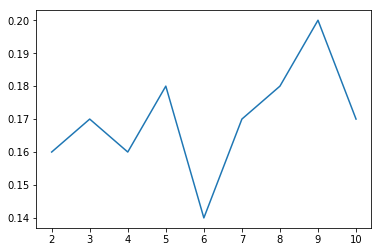

0.318
Time: 0:01:45.936735 s


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors

DATA_PATH = "D:/学习/课程资料/计算机视觉/cifar-10-python/cifar-10-batches-py/"

def unpack(fname):
    import pickle
    with open(fname, "rb") as fin:
        dumped = pickle.load(fin, encoding="bytes")
    return dumped

def reshape(data):
    img = np.zeros((32, 32, 3), 'uint8')
    img[..., 0] = np.reshape(data[:1024], (32, 32))
    img[..., 1] = np.reshape(data[1024:2048], (32, 32))
    img[..., 2] = np.reshape(data[2048:3072], (32, 32))
    return img


batches_meta = unpack(DATA_PATH + "batches.meta")
data_batches = [
    unpack(DATA_PATH + "data_batch_" + str(i+1))
    for i in range(5)
]
test_batch = unpack(DATA_PATH + "test_batch")

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.feature import hog
radius = 3
n_points = 8 * radius
data_lbp = []
labels_lbp = []
for i in range(5):
    labels_lbp.extend(data_batches[i][b"labels"])
    for img in data_batches[i][b"data"]:
        tmp  = local_binary_pattern(rgb2gray(reshape(img)), n_points, radius)
        data_lbp.append(tmp.flatten())
    # data_batches[i][b"data"] = [((hog(rgb2gray(reshape(img))))) for img in data_batches[i][b"data"]]
# from tkinter import _flatten
# labels_lbp = list(_flatten(labels_lbp)))
indext = 0
test_lbp = []
for img in test_batch[b"data"]:
        tmp  = local_binary_pattern(rgb2gray(reshape(img)), n_points, radius)
        test_lbp.append(tmp.flatten())

hyperparam_train_data = data_lbp[:900]
hyperparam_train_labels = labels_lbp[:900]
hyperparam_test_data = data_lbp[900:1000]
hyperparam_test_labels = labels_lbp[900:1000]

import datetime
begin = datetime.datetime.now()
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
correct_sums = []

for k in ks:
    clf = neighbors.KNeighborsClassifier(k, weights="distance")
    clf.fit(hyperparam_train_data, hyperparam_train_labels)
    
    predict = clf.predict(hyperparam_test_data)
    
    correct_sum = 0
    for i in range(len(predict)):
        if (predict[i] == hyperparam_test_labels[i]):
            correct_sum += 1
    
    correct_sums.append(correct_sum / 100.0)

plt.plot(ks, correct_sums)
plt.show()
# maxindex = correct_sums.index(max(correct_sums))
# print("max k",ks[maxindex])
clf = neighbors.KNeighborsClassifier(7, weights="distance")

# for i in range(5):
clf.fit(data_lbp, labels_lbp)
predict = clf.predict(test_lbp[:1000])

correct_sum = 0
for i in range(len(predict)):
    if (predict[i] == test_batch[b"labels"][i]):
        correct_sum += 1

print(correct_sum / 1000.0)
end = datetime.datetime.now()
print('Time:',end - begin, 's')